<h1 align="center" style="color:pink">Handwritten Digit Classification using ANN <h1>

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [33]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [34]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Feature Scaling

In [35]:
X_train=X_train/255

In [36]:
X_test=X_test/255

In [37]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
model=Sequential()

In [39]:
model.add(Flatten(input_shape=(28,28)))

In [40]:
model.add(Dense(128,activation='relu'))

In [41]:
model.add(Dense(32,activation='relu'))

In [42]:
model.add(Dense(10,activation='Softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [45]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2798 - val_loss: 0.1610
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1190 - val_loss: 0.1169
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0821 - val_loss: 0.0954
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0620 - val_loss: 0.0959
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0488 - val_loss: 0.0977
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0374 - val_loss: 0.0941
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0313 - val_loss: 0.0909
Epoch 8/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0265 - val_loss: 0.0943
Epoch 9/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0236 - val_loss: 0.0983
Epoch 10/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0

In [15]:
y_prob=model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [16]:
y_pred=y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9699

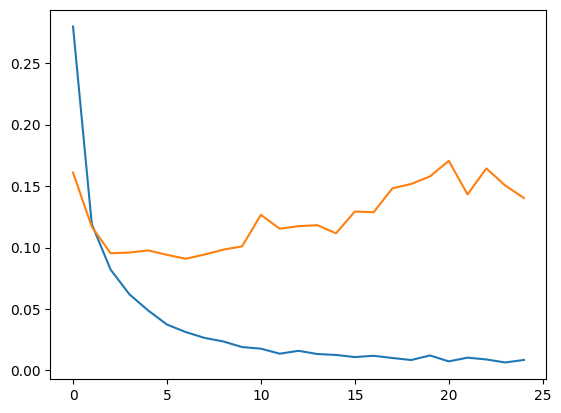

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Test some example

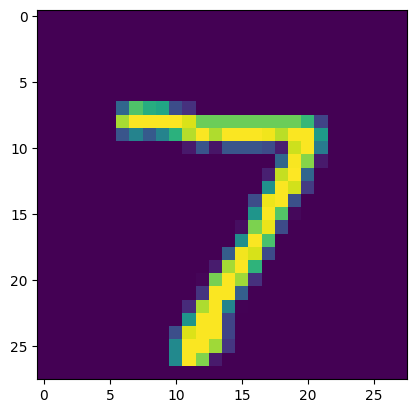

In [50]:
plt.imshow(X_test[0])

In [52]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([7], dtype=int64)

Done